In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline  
 
 
 
symbols = [ "SPY", "QQQ", "VGK", "SCZ", "EWJ", "EEM", #eq
           "REM", "VNQ", "RWX", # re
           "TIP", "IEF", "TLT", "BWX", #fi
           "DBC", "GLD" #como
          ]
 
all_stocks = pd.DataFrame()
 
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2019-11-07', 
                      end= date.today(), 
                      progress=False)['Open']
    all_stocks = pd.concat([all_stocks, tmp_close], axis=1)
 
all_stocks.columns=symbols
all_stocks

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD
2019-11-06,307.100006,199.759995,56.220001,60.180000,59.610001,43.759998,43.270000,92.230003,40.830002,116.279999,111.279999,137.979996,28.610001,15.580000,140.449997
2019-11-07,308.179993,200.429993,56.340000,60.459999,59.959999,44.080002,43.410000,91.309998,40.720001,115.629997,110.389999,135.479996,28.430000,15.570000,138.270004
2019-11-08,308.940002,201.229996,56.279999,60.419998,59.930000,43.680000,43.599998,91.089996,40.320000,115.559998,110.239998,134.910004,28.340000,15.610000,137.389999
2019-11-11,308.350006,200.960007,56.270000,60.470001,59.779999,43.369999,43.520000,91.290001,40.130001,115.620003,110.360001,135.000000,28.389999,15.510000,137.059998
2019-11-12,309.000000,201.539993,56.230000,60.400002,59.910000,43.090000,43.450001,90.599998,39.919998,115.599998,110.410004,135.619995,28.309999,15.520000,137.429993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-09,457.540009,366.730011,67.279999,70.169998,65.519997,49.799999,33.480000,106.739998,33.990002,123.940002,111.019997,138.429993,27.500000,22.910000,171.210007
2022-02-10,449.320007,358.429993,66.419998,69.330002,64.480003,49.470001,32.840000,104.220001,33.840000,122.949997,110.000000,136.229996,27.240000,22.790001,170.559998
2022-02-11,440.459991,347.059998,65.180000,68.300003,63.959999,48.720001,32.490002,103.269997,33.330002,124.050003,111.139999,138.250000,27.309999,23.129999,173.809998
2022-02-14,439.019989,347.489990,64.540001,67.800003,63.959999,48.380001,32.180000,102.330002,33.200001,123.720001,110.370003,136.529999,27.160000,23.250000,174.740005


In [13]:
returns = np.log(all_stocks/all_stocks.shift(1)).dropna(how="any")
returns

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD
2019-11-07,0.003511,0.003348,0.002132,0.004642,0.005854,0.007286,0.003230,-0.010025,-0.002698,-0.005606,-0.008030,-0.018285,-0.006311,-0.000642,-0.015643
2019-11-08,0.002463,0.003983,-0.001066,-0.000662,-0.000500,-0.009116,0.004367,-0.002412,-0.009872,-0.000606,-0.001360,-0.004216,-0.003171,0.002566,-0.006385
2019-11-11,-0.001912,-0.001343,-0.000178,0.000827,-0.002506,-0.007122,-0.001837,0.002193,-0.004723,0.000519,0.001088,0.000667,0.001763,-0.006427,-0.002405
2019-11-12,0.002106,0.002882,-0.000711,-0.001158,0.002172,-0.006477,-0.001610,-0.007587,-0.005247,-0.000173,0.000453,0.004582,-0.002822,0.000645,0.002696
2019-11-13,0.000324,0.000248,-0.001780,-0.003649,-0.003511,-0.007688,-0.001612,0.009119,-0.005526,0.000865,0.002713,0.006468,0.002470,0.001931,0.003994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-09,0.014530,0.020969,0.016787,0.018555,0.013677,0.015583,0.006292,0.022358,0.022613,0.001938,0.001352,0.001880,0.005835,0.010090,0.003393
2022-02-10,-0.018129,-0.022893,-0.012865,-0.012043,-0.016000,-0.006649,-0.019301,-0.023892,-0.004423,-0.008020,-0.009230,-0.016020,-0.009500,-0.005252,-0.003804
2022-02-11,-0.019916,-0.032236,-0.018846,-0.014968,-0.008097,-0.015277,-0.010715,-0.009157,-0.015186,0.008907,0.010310,0.014719,0.002566,0.014809,0.018876
2022-02-14,-0.003275,0.001238,-0.009867,-0.007348,0.000000,-0.007003,-0.009587,-0.009144,-0.003908,-0.002664,-0.006952,-0.012519,-0.005508,0.005175,0.005336


<AxesSubplot:>

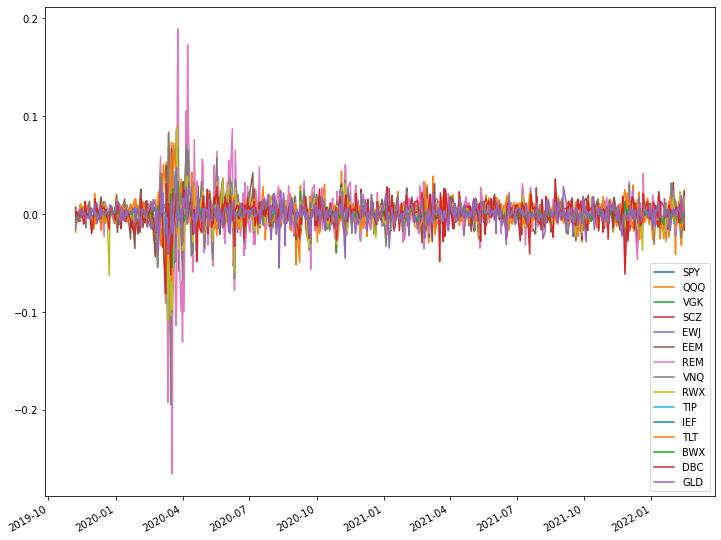

In [14]:
returns.plot(figsize=(12,10))

In [15]:
# mean daily returns per stock 
returns.mean()

SPY    0.000652
QQQ    0.001009
VGK    0.000281
SCZ    0.000248
EWJ    0.000142
EEM    0.000213
REM   -0.000486
VNQ    0.000197
RWX   -0.000336
TIP    0.000101
IEF   -0.000020
TLT   -0.000038
BWX   -0.000088
DBC    0.000670
GLD    0.000365
dtype: float64

In [98]:
returns.mean()@guess

0.000193902409530285

In [103]:
from scipy.optimize import minimize, Bounds
lamb = 0.05

mu = returns.mean()

# the objective function is to minimize the portfolio risk
def objective_cov(weights): 
    weights = np.array(weights)
    return weights.dot(returns.cov()).dot(weights.T)

def objective_corr(weights): 
    weights = np.array(weights)
    return weights.dot(np.corrcoef(returns.T)).dot(weights.T)

# max mu.T @ x − lamb x.T @ S @ x
def objective_combined(weights): 
    weights = np.array(weights)
    return - mu@weights + lamb* weights.dot(returns.cov()).dot(weights.T) 

cons = ({"type":"eq", "fun": lambda x: np.sum(x)-1}, # The weights must sum up to one.
        # This constraints says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        {"type": "ineq", "fun": lambda x: np.sum(returns.mean()*x)-0.006}) 
 
 
#Every stock can get any weight from 0 to 1

bounds = Bounds(0, 1)
 
# Initialize the weights with an even split
# In out case each stock will have 10% at the beginning
guess = [1./returns.shape[1] for x in range(returns.shape[1])]
 
 
optimized_results = minimize(objective_combined, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

     fun: -0.001008886205686015
     jac: array([-6.51356720e-04, -1.00873363e-03, -2.80478067e-04, -2.47317250e-04,
       -1.42034740e-04, -2.12404528e-04,  4.86346631e-04, -1.96744892e-04,
        3.36118363e-04, -1.01026119e-04,  1.95368484e-05,  3.83070146e-05,
        8.75621627e-05, -6.69781584e-04, -3.64542604e-04])
 message: 'Positive directional derivative for linesearch'
    nfev: 389
     nit: 21
    njev: 17
  status: 8
 success: False
       x: array([0.00000000e+00, 1.00000000e+00, 2.96680293e-13, 0.00000000e+00,
       0.00000000e+00, 4.26735206e-14, 6.97395854e-14, 5.15888922e-13,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.31534547e-13,
       0.00000000e+00, 2.59253237e-12, 2.15910124e-14])

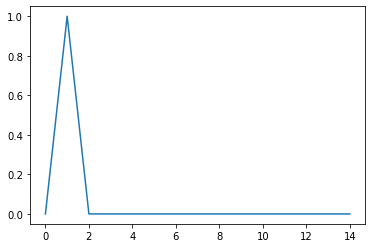

In [104]:
plt.plot(optimized_results.x)

In [71]:
# we get 1
np.sum(optimized_results.x)

1.0000000000031806

In [72]:
np.sum(returns.mean()*optimized_results.x)

0.0010090387922677552